**1870091 최혜빈 통계프로그래밍 HW#4**

## Problem 1

In [1]:
#필요한 라이브러리 불러오기
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

### a) Do the Poisson regression

In [2]:
data_x = pd.read_csv('X_poisson.csv') #csv파일 불러오기
data_y = pd.read_csv('y_poisson.csv')

In [3]:
data_x.head() # 앞의 5행만 확인

,Area,Elevation,Nearest,Scruz,Adjacent
0,25.09,346,0.6,0.6,1.84
1,1.24,109,0.6,26.3,572.33
2,0.21,114,2.8,58.7,0.78
3,0.10,46,1.9,47.4,0.18
4,0.05,77,1.9,1.9,903.82


In [4]:
data_y.head()# 앞의 5행만 확인

,x
0,58
1,31
2,3
3,25
4,2


In [5]:
#matrix 계산을 위해 numpy행렬로 변환
X_train = data_x.to_numpy()
y = data_y.to_numpy()

In [6]:
X_train[:5]

array([[2.5090e+01, 3.4600e+02, 6.0000e-01, 6.0000e-01, 1.8400e+00],
       [1.2400e+00, 1.0900e+02, 6.0000e-01, 2.6300e+01, 5.7233e+02],
       [2.1000e-01, 1.1400e+02, 2.8000e+00, 5.8700e+01, 7.8000e-01],
       [1.0000e-01, 4.6000e+01, 1.9000e+00, 4.7400e+01, 1.8000e-01],
       [5.0000e-02, 7.7000e+01, 1.9000e+00, 1.9000e+00, 9.0382e+02]])

In [7]:
y[:5] # 리스트 안에 리스트인 형태이므로 이를 바꿔준다

array([[58],
       [31],
       [ 3],
       [25],
       [ 2]], dtype=int64)

In [8]:
y = y.ravel() # 다차원 함수를 1차원으로 풀어주는 함수인 ravel 함수 사용

In [9]:
y[:5] # y 데이터의 형태가 달라진 것을 확인 할 수 있다. 

array([58, 31,  3, 25,  2], dtype=int64)

In [10]:
print(X_train.shape, y.shape) # shape 

(30, 5) (30,)


In [11]:
my_ones = np.ones([X_train.shape[0],1]) #regression을 위해 bias로 x_train 행렬에 1을 맨 앞에 붙여준다
X = np.concatenate((my_ones, X_train), axis=1) #두 열을 붙여주는 concatenate(axis=1) 함수를 사용한다
print(X.shape) #shape 확인결과 5 ->6 으로 한 차원 커졌다
print(y.shape)

(30, 6)
(30,)


In [12]:
#poisson regression model 생성 - 데이터 X, y에 대한 모델 설정
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()) #Find W based on MLE
poisson_results = poisson_model.fit() #fit 함수로 모델에 X, y값들을 적용 

In [13]:
print(poisson_results.summary()) #모델 결과 확인 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -438.84
Date:                Tue, 01 Dec 2020   Deviance:                       716.85
Time:                        01:49:37   Pearson chi2:                     762.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1548      0.052     60.963      0.0

In [14]:
#이 model의 이탈도 확인 
np.mean(poisson_results.resid_deviance)

-0.5998465058894813

In [15]:
yhat = poisson_results.mu #각각에 대해 모델로 예측값 뽑아내기 

In [16]:
print(yhat)

[ 78.72433747  20.40292901  25.72247584  21.40532735  17.0144771
  36.58544939  32.08060553  10.91856356  29.83009271  26.77630092
  27.86135031  87.7441536   15.91866805  38.22167222  25.0255798
 370.82105491  55.75847736  20.29374133 212.60359396 121.42695263
  32.19599324  53.05982272 218.82131936 370.97834213 297.27799537
  60.88144167 158.16532033  36.89431752  35.52164118  18.06800342]


In [17]:
np.mean((y-yhat)**2)  #MSE 계산

2801.6143008601753

In [18]:
#mse 구하는 다른 방법 (W: 각각의 변수의 파라미터 값 (beta값))
W = poisson_results.params
yhat = np.exp(np.dot(X, W) ) #X와 W의 행렬곱에 exp 연산으로 yhat값을 구한다

In [19]:
np.mean((y-yhat)**2) # 앞서 구한 MSE와 동일함

2801.6143008601753

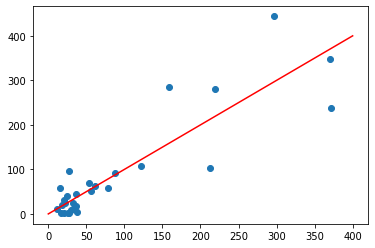

In [20]:
#poisson regression결과를 그래프로 확인하면 다음과 같다
plt.plot(yhat,y, 'o')
plt.plot([0, 400], [0,400], 'r-')

### b) You are given the new island. Area=15, Elevation=100, Nearest=1, Scruz = 3, Adjacent = 20. What is the expected value of Species in this island?

In [21]:
#새로운 데이터를 array행렬로 만들고, 그 값을 기반으로 모델에 넣어 예측값을 확인할 수 있다
Xnew = np.array([1,15,100,1,3,20]) #맨앞에 bias값 1 추가
ynewpred = poisson_results.predict(Xnew)

In [22]:
print(ynewpred) # expected value of Species : 32.41446649

[32.41446649]


## Problem 2

### Do the logistic regression with the train data.

In [23]:
data_x = pd.read_csv('X_train_logistic.csv') #csv파일 불러오기
data_y = pd.read_csv('y_train_logistic.csv')

In [24]:
data_x.head()# 앞의 5행만 확인

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,360,170,4654,13.0,73,1
1,4,90,75,2108,15.5,74,2
2,6,250,110,3520,16.4,77,1
3,4,120,74,2635,18.3,81,3
4,4,96,69,2189,18.0,72,2


In [25]:
data_x.dtypes

cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [26]:
data_y.head() # 앞의 5행만 확인

,x
0,False
1,True
2,False
3,True
4,True


In [27]:
data_y.dtypes #y의 데이터 타입은 bool형

x    bool
dtype: object

In [28]:
data_y = data_y.astype(int) #보기 편하게 할려고 데이터 타입은 int형으로 변환

In [29]:
#matrix 계산을 위해 numpy행렬로 변환
X_train = data_x.to_numpy()
y_train = data_y.to_numpy()

In [30]:
X_train[:5]

array([[8.000e+00, 3.600e+02, 1.700e+02, 4.654e+03, 1.300e+01, 7.300e+01,
        1.000e+00],
       [4.000e+00, 9.000e+01, 7.500e+01, 2.108e+03, 1.550e+01, 7.400e+01,
        2.000e+00],
       [6.000e+00, 2.500e+02, 1.100e+02, 3.520e+03, 1.640e+01, 7.700e+01,
        1.000e+00],
       [4.000e+00, 1.200e+02, 7.400e+01, 2.635e+03, 1.830e+01, 8.100e+01,
        3.000e+00],
       [4.000e+00, 9.600e+01, 6.900e+01, 2.189e+03, 1.800e+01, 7.200e+01,
        2.000e+00]])

In [31]:
y_train[:5] # 리스트 안에 리스트인 형태이므로 이를 바꿔준다

array([[0],
       [1],
       [0],
       [1],
       [1]])

In [32]:
y_train = y_train.ravel() # 다차원 함수를 1차원으로 풀어주는 함수인 ravel 함수 사용

In [33]:
#regression을 위해 bias로 x_train 행렬에 1을 맨 앞에 붙여준다
my_ones = np.ones([X_train.shape[0],1]) #먼저 shape에 맞춰 1차원의 행렬 생성
X_train = np.concatenate((my_ones, X_train), axis=1) #두 열을 붙여주는 concatenate(axis=1) 함수를 사용한다

In [34]:
#최종 두 데이터의 차원 확인
print(X_train.shape)
print(y_train.shape)

(300, 8)
(300,)


In [35]:
#logistic regression model 생성 - 데이터 X, y에 대한 모델 설정 (binomial)
glm_logistic = sm.GLM(y_train,X_train, family=sm.families.Binomial())
logistic_results = glm_logistic.fit() #fit 함수로 모델에 X, y값들을 적용 

In [36]:
print(logistic_results.summary()) #모델 결과 확인 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      292
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.406
Date:                Tue, 01 Dec 2020   Deviance:                       120.81
Time:                        01:49:57   Pearson chi2:                     141.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2650      6.533     -2.643      0.0

In [37]:
yhat = logistic_results.mu #각각에 대해 모델로 예측값 뽑아내기 
yhat[:5] #앞의 다섯개의 값만 확인

array([1.08391727e-06, 9.61123190e-01, 1.53745784e-02, 9.85964774e-01,
       8.80241110e-01])

In [38]:
admission_hat = yhat>0.5 #예측값 yhat값이 0.5보다 크면 1로, 0.5보다 작으면 0으로 계산된다- logistic regression
admission_hat[:5] #bool형으로 false, true의 형태로 결과 값이 나온다

array([False,  True, False,  True,  True])

In [39]:
#train accuracy
np.mean(admission_hat==y_train) #admission_hat값과 y_train값을 비교하여 accuracy를 구한다

0.9033333333333333

In [40]:
#train accuracy를 구하는 다른 방법
W = logistic_results.params # Estimated parameters (W: 각각의 변수의 파라미터 값 (beta값))
my_y_hat = 1/(1+np.exp(-np.dot(X_train, W))) #예측값 구하는 식
my_admission_hat = my_y_hat>0.5 #예측값 yhat값이 0.5보다 크면 1로, 0.5보다 작으면 0으로
np.mean(my_admission_hat==y_train) #admission_hat값과 y_train값을 비교하여 accuracy를 구한다
#위의 값과 동일하다

0.9033333333333333

###  What is accuracy of your logistic regression model in 1> with the following test data? 

In [41]:
X_test = pd.read_csv('X_test_logistic.csv') #csv파일 불러오기
y_test = pd.read_csv('y_test_logistic.csv')

In [42]:
y_test = y_test.astype(int) #보기 편하게 할려고 데이터 타입은 int형으로 변환

In [43]:
X_test = X_test.to_numpy() #matrix 계산을 위해 numpy행렬로 변환
y_test = y_test.to_numpy()

In [44]:
X_test[:5]

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 1.200e+01, 7.000e+01,
        1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 1.150e+01, 7.000e+01,
        1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 1.100e+01, 7.000e+01,
        1.000e+00],
       [8.000e+00, 4.540e+02, 2.200e+02, 4.354e+03, 9.000e+00, 7.000e+01,
        1.000e+00],
       [8.000e+00, 3.830e+02, 1.700e+02, 3.563e+03, 1.000e+01, 7.000e+01,
        1.000e+00]])

In [45]:
y_test[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [46]:
y_test = y_test.ravel() # 다차원 함수를 1차원으로 풀어주는 함수인 ravel 함수 사용

In [47]:
#regression을 위해 bias로 x_train 행렬에 1을 맨 앞에 붙여준다
my_ones = np.ones([X_test.shape[0],1]) #먼저 shape에 맞춰 1차원의 행렬 생성
X_test = np.concatenate((my_ones, X_test), axis=1) #두 열을 붙여주는 concatenate(axis=1) 함수를 사용한다

In [48]:
X_test.shape, y_test.shape

((92, 8), (92,))

In [49]:
#X_test데이터로 y 예측값을 구하고 위에서 accurcy를 구한 방법과 동일하게 accuracy를 구한다
y_test_hat = logistic_results.predict(X_test) 
y_test_hat[:5]

array([4.81078006e-04, 1.99564659e-05, 1.88512139e-04, 3.02199253e-08,
       2.20104140e-05])

In [50]:
admission_hat = y_test_hat>0.5 #예측값 yhat값이 0.5보다 크면 1로, 0.5보다 작으면 0으로 계산된다- logistic regression
admission_hat[:5] #bool형으로 false, true의 형태로 결과 값이 나온다

array([False, False, False, False, False])

In [51]:
#test accuracy
np.mean(admission_hat==y_test) #admission_hat값과 y_train값을 비교하여 accuracy를 구한다

0.9239130434782609

## Problem 3

### Do the multivariate classification using softmax activation function with training data. 

In [52]:
data_x = pd.read_csv('X_train_multi_logistic.csv') #csv파일 불러오기
data_y = pd.read_csv('y_train_multi_logistic.csv')

In [53]:
data_x.head()

,Alcohol,Color
0,13.20,4.38
1,13.24,4.32
2,14.06,5.05
3,14.75,5.40
4,14.38,7.50


In [54]:
data_y.head()

,x
0,1
1,1
2,1
3,1
4,1


In [55]:
X_train = data_x.to_numpy() #matrix 계산을 위해 numpy행렬로 변환
y_train = data_y.to_numpy()

In [56]:
X_train[:5] #앞의 다섯행만 확인

array([[13.2 ,  4.38],
       [13.24,  4.32],
       [14.06,  5.05],
       [14.75,  5.4 ],
       [14.38,  7.5 ]])

In [57]:
y_train[:5] #앞의 다섯행만 확인

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [58]:
y_train = y_train.ravel() # 다차원 함수를 1차원으로 풀어주는 함수인 ravel 함수 사용

In [59]:
print(X_train.shape, y_train.shape)

(58, 2) (58,)


In [60]:
from sklearn.linear_model import LogisticRegression
#logistic regression model 생성 - 데이터 X, y에 대한 모델 설정 (multinomial)
softReg = LogisticRegression(multi_class = 'multinomial')
softReg.fit(X_train,y_train)  #fit 함수로 모델에 X_train, y_train값들을 적용 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
softReg.intercept_ #logistic regression으로 구한 기울기 값들

array([-26.52427046,  21.7254036 ,   4.79886686])

In [62]:
softReg.coef_ #logistic regression으로 구한 절편값들

array([[ 2.02467776,  0.05728722],
       [-1.32375467, -0.97365015],
       [-0.70092308,  0.91636293]])

In [63]:
yhat = softReg.predict(X_train) #predict로 y예측값
yhat.shape

(58,)

In [64]:
np.mean(y_train==yhat) #train accuracy y_train값과 yhat값 같은지

0.8620689655172413

In [65]:
softReg.score(X_train, y_train) #train accuracy (score로 계산)

0.8620689655172413

### What is accuracy of your classification model in 1> with the following test data? 

In [66]:
X_test = pd.read_csv('X_test_multi_logistic.csv') #csv파일 불러오기
y_test = pd.read_csv('y_test_multi_logistic.csv')

In [67]:
X_test = X_test.to_numpy()  #matrix 계산을 위해 numpy행렬로 변환
y_test = y_test.to_numpy()

In [68]:
X_test[:5] #앞의 다섯행만 확인

array([[13.2 ,  4.38],
       [13.24,  4.32],
       [14.06,  5.05],
       [14.75,  5.4 ],
       [14.38,  7.5 ]])

In [69]:
y_test[:5] #앞의 다섯행만 확인

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [70]:
y_test = y_test.ravel() # 다차원 함수를 1차원으로 풀어주는 함수인 ravel 함수 사용

In [71]:
X_test.shape, y_test.shape

((58, 2), (58,))

In [72]:
y_pred = softReg.predict(X_test)#predict로 y예측값

In [73]:
np.mean(y_test==y_pred) #test accuracy y_test값과 yhat값 같은지

0.8620689655172413

In [74]:
softReg.score(X_test, y_test) #test accuracy (score로 계산)

0.8620689655172413